In [1]:
import pandas as pd
import warnings
import seaborn as sns
import numpy as np
import uproot 

In [ ]:
This file is very messy but shows how the root files are converted into the csv files with the labels on the supercells

In [23]:
txt_df =[]
txt_File = uproot.open(r"C:\Users\oscar\OneDrive\Documents\Year4_Project\l1calo_hist_EGZ_extended.root")
txt_Tree = txt_File["tree_DMC"]
txt_df.append(txt_File["tree_DMC"].arrays(library="pd"))
txt_DF=pd.concat(txt_df)
txt_DF.head()
Super_ZMUMU = txt_DF['SuperCell_ET'][0:100]
# Create a new DataFrame with features and add a 'label' column
# Here, we assign label '1' to all the samples from this file
Super_ZMUMU_df = pd.DataFrame(Super_ZMUMU)
txt_DF['label'] = 0

# Now Super_ZMUMU_df has the features and the labels suitable for machine learning training
print(txt_DF.head())




      TOB_ET  TOB_eta  TOB_ieta  TOB_ietabin   TOB_phi  offline_ele_pt  \
0  22.500000  -0.2875        -3            2  2.896156       22.860487   
1  32.200001  -0.5875        -6            5 -1.619884       30.928337   
2  20.000000   0.1375         1            1 -0.638136       20.700048   
3   8.900000   1.4875        14           14  1.030835       42.459045   
4  38.500000   0.2125         2            2 -1.914408       36.940105   

   offline_ele_eta  offline_ele_eta_cal  offline_ele_phi  offline_ele_phi_cal  \
0        -0.278998            -0.286387         2.860483             2.882413   
1        -0.596390            -0.588561        -1.626244            -1.639588   
2         0.206087             0.150844        -0.584220            -0.609071   
3         1.508192             1.500046         0.987355             0.987977   
4         0.249134             0.218442        -1.945299            -1.933747   

   ...  eFEX_L2_ET  eFEX_L3_ET  \
0  ...   12.175000         0.0   


In [24]:
# Assuming txt_DF is your DataFrame and 'SuperCell_ET' is the column with Awkward Arrays

# Define the function to extract and reorder L0
def extract_L0(super_cell_et):
    # Convert Awkward Array to a NumPy array
    np_array = super_cell_et.to_numpy()  # Using the Awkward Array method to convert to numpy
    # Extract L0 by taking every 11th element starting from the 0th index
    L0 = np_array[::11]
    return L0

# Initialize an empty list to store the L0 data
L0_data = []

# Loop through each row in the DataFrame
for i in range(len(txt_DF)):
    # Call the extract_L0 function and append the result to L0_data
    L0_data.append(extract_L0(txt_DF['SuperCell_ET'].iloc[i]))

# Assign the L0_data list as a new column in the DataFrame
txt_DF['L0'] = L0_data

# Check the new DataFrame with the 'L0' column
print(txt_DF.head())


      TOB_ET  TOB_eta  TOB_ieta  TOB_ietabin   TOB_phi  offline_ele_pt  \
0  22.500000  -0.2875        -3            2  2.896156       22.860487   
1  32.200001  -0.5875        -6            5 -1.619884       30.928337   
2  20.000000   0.1375         1            1 -0.638136       20.700048   
3   8.900000   1.4875        14           14  1.030835       42.459045   
4  38.500000   0.2125         2            2 -1.914408       36.940105   

   offline_ele_eta  offline_ele_eta_cal  offline_ele_phi  offline_ele_phi_cal  \
0        -0.278998            -0.286387         2.860483             2.882413   
1        -0.596390            -0.588561        -1.626244            -1.639588   
2         0.206087             0.150844        -0.584220            -0.609071   
3         1.508192             1.500046         0.987355             0.987977   
4         0.249134             0.218442        -1.945299            -1.933747   

   ...  eFEX_L3_ET                                       SuperCell_E

In [25]:
import awkward as ak

# Assuming txt_DF is your DataFrame and 'SuperCell_ET' is the column with Awkward Arrays

def extract_L1(super_cell_et):
    # Make sure the input is an Awkward Array
    assert isinstance(super_cell_et, ak.Array), "Input must be an Awkward Array"
    
    # Extract L1 according to the logic provided
    L1 = [super_cell_et[i+j] for i in range(0, 99, 11) for j in range(1, 5)]
    
    return L1

# Apply the function to each element of the 'SuperCell_ET' column directly
txt_DF['L1'] = [extract_L1(ak_array) for ak_array in txt_DF['SuperCell_ET']]

# Check the new DataFrame with the 'L1' column
# print(txt_DF.head())


In [26]:
# Assuming txt_DF is your DataFrame and 'SuperCell_ET' is the column with Awkward Arrays

def extract_L2(super_cell_et):
    # Make sure the input is an Awkward Array
    assert isinstance(super_cell_et, ak.Array), "Input must be an Awkward Array"
    
    # Extract L2 according to the logic provided
    L2 = [super_cell_et[i+j] for i in range(0, 99, 11) for j in range(5, 9)]
    
    return L2

# Apply the function to each element of the 'SuperCell_ET' column directly
txt_DF['L2'] = [extract_L2(ak_array) for ak_array in txt_DF['SuperCell_ET']]

# Check the new DataFrame with the 'L2' column
print(txt_DF[['L2']].head())



                                                  L2
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.125, 0.0...
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...


In [27]:

# Assuming txt_DF is your DataFrame and 'SuperCell_ET' is the column with Awkward Arrays

def extract_L3(super_cell_et):
    # Make sure the input is an Awkward Array
    assert isinstance(super_cell_et, ak.Array), "Input must be an Awkward Array"
    
    # Initialize L3 and the modifier m
    L3 = []
    m = -1
    
    # Apply the logic to extract L3
    for i in range(1, 99):  # Starting from 1 since we're skipping 0
        if i % 10 == 0:
            L3.append(super_cell_et[i + m])
            m += 1

    return L3

# Apply the function to each element of the 'SuperCell_ET' column directly
txt_DF['L3'] = [extract_L3(ak_array) for ak_array in txt_DF['SuperCell_ET']]

# Check the new DataFrame with the 'L3' column
print(txt_DF[['L3']].head())


                                              L3
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [28]:

# Adjust the extract_Had function to start from the 10th element (index 10)
# and jump 11 each time, so it extracts 10, 21, 32, and so on.
def extract_Had_adjusted(super_cell_et):
    # Initialize Had
    Had = []

    # Start from the 11th element (index 10) and jump 11 each time
    index = 10
    while index < len(super_cell_et):
        Had.append(super_cell_et[index])
        index += 11  # Move to the next index 11 places away
    
    return Had

# Apply the adjusted function to each element of the 'SuperCell_ET' column directly
txt_DF['Had'] = [extract_Had_adjusted(np_array) for np_array in txt_DF['SuperCell_ET']]

# Check the new DataFrame with the adjusted 'Had' column
#txt_DF.head()


In [29]:
txt_df1 =[]
txt_File1 = uproot.open("l1calo_hist_EGZ_extended.root")
txt_Tree1 = txt_File1["tree_DMC"]
txt_df1.append(txt_File1["tree_DMC"].arrays(library="pd"))
txt_DF1=pd.concat(txt_df1)
txt_DF1.head()
Super_EGZ = txt_DF1['SuperCell_ET']
#print(Super_EGZ)
Super_EGZ_df = pd.DataFrame(Super_EGZ)

txt_DF1['label'] = 1
print(txt_df1)

[          TOB_ET  TOB_eta  TOB_ieta  TOB_ietabin   TOB_phi  offline_ele_pt  \
0      22.500000  -0.2875        -3            2  2.896156       22.860487   
1      32.200001  -0.5875        -6            5 -1.619884       30.928337   
2      20.000000   0.1375         1            1 -0.638136       20.700048   
3       8.900000   1.4875        14           14  1.030835       42.459045   
4      38.500000   0.2125         2            2 -1.914408       36.940105   
...          ...      ...       ...          ...       ...             ...   
89164  21.799999  -0.5625        -6            5  2.208932       22.560619   
89165  26.500000  -0.8125        -9            8 -2.012583       26.853746   
89166  28.799999   0.2375         2            2 -2.208932       29.643717   
89167  27.500000   0.2875         2            2 -2.994330       28.464281   
89168  38.400002   1.4125        14           14  2.110758       35.536255   

       offline_ele_eta  offline_ele_eta_cal  offline_ele_phi  

In [30]:

# Assuming txt_DF1 is your DataFrame and 'SuperCell_ET' is the column with Awkward Arrays

# Define the function to extract and reorder L0 for the new dataset
def extract_L0(super_cell_et):
    # Convert Awkward Array to a NumPy array
    np_array = super_cell_et.to_numpy()  # Using the Awkward Array method to convert to numpy
    # Extract L0_1 by taking every 11th element starting from the 0th index
    L0 = np_array[::11]
    return L0

# Initialize an empty list to store the L0_1 data
L0_data = []

# Loop through each row in the DataFrame
for i in range(len(txt_DF1)):
    # Call the extract_L0_1 function and append the result to L0_1_data
    L0_data.append(extract_L0(txt_DF1['SuperCell_ET'].iloc[i]))

# Assign the L0_1_data list as a new column in the DataFrame
txt_DF1['L0'] = L0_data

# Check the new DataFrame with the 'L0_1' column
print(txt_DF1.head())


      TOB_ET  TOB_eta  TOB_ieta  TOB_ietabin   TOB_phi  offline_ele_pt  \
0  22.500000  -0.2875        -3            2  2.896156       22.860487   
1  32.200001  -0.5875        -6            5 -1.619884       30.928337   
2  20.000000   0.1375         1            1 -0.638136       20.700048   
3   8.900000   1.4875        14           14  1.030835       42.459045   
4  38.500000   0.2125         2            2 -1.914408       36.940105   

   offline_ele_eta  offline_ele_eta_cal  offline_ele_phi  offline_ele_phi_cal  \
0        -0.278998            -0.286387         2.860483             2.882413   
1        -0.596390            -0.588561        -1.626244            -1.639588   
2         0.206087             0.150844        -0.584220            -0.609071   
3         1.508192             1.500046         0.987355             0.987977   
4         0.249134             0.218442        -1.945299            -1.933747   

   ...  eFEX_L3_ET                                       SuperCell_E

In [31]:

# Assuming txt_DF1 is your DataFrame and 'SuperCell_ET' is the column with Awkward Arrays

def extract_L1(super_cell_et):
    # Make sure the input is an Awkward Array
    assert isinstance(super_cell_et, ak.Array), "Input must be an Awkward Array"
    
    # Extract L1_1 according to the logic provided
    L1 = [super_cell_et[i+j] for i in range(0, 99, 11) for j in range(1, 5)]
    
    return L1

# Apply the function to each element of the 'SuperCell_ET' column directly in txt_DF1
txt_DF1['L1'] = [extract_L1(ak_array) for ak_array in txt_DF1['SuperCell_ET']]

# Check the new DataFrame with the 'L1_1' column
print(txt_DF1.head())


      TOB_ET  TOB_eta  TOB_ieta  TOB_ietabin   TOB_phi  offline_ele_pt  \
0  22.500000  -0.2875        -3            2  2.896156       22.860487   
1  32.200001  -0.5875        -6            5 -1.619884       30.928337   
2  20.000000   0.1375         1            1 -0.638136       20.700048   
3   8.900000   1.4875        14           14  1.030835       42.459045   
4  38.500000   0.2125         2            2 -1.914408       36.940105   

   offline_ele_eta  offline_ele_eta_cal  offline_ele_phi  offline_ele_phi_cal  \
0        -0.278998            -0.286387         2.860483             2.882413   
1        -0.596390            -0.588561        -1.626244            -1.639588   
2         0.206087             0.150844        -0.584220            -0.609071   
3         1.508192             1.500046         0.987355             0.987977   
4         0.249134             0.218442        -1.945299            -1.933747   

   ...                                       SuperCell_ET   eFEX_ReC

In [32]:
import awkward as ak

# Assuming txt_DF1 is your DataFrame and 'SuperCell_ET' is the column with Awkward Arrays

def extract_L2_1(super_cell_et):
    # Make sure the input is an Awkward Array
    assert isinstance(super_cell_et, ak.Array), "Input must be an Awkward Array"
    
    # Extract L2_1 according to the logic provided
    L2_1 = [super_cell_et[i+j] for i in range(0, 99, 11) for j in range(5, 9)]
    
    return L2_1

# Apply the function to each element of the 'SuperCell_ET' column directly in txt_DF1
txt_DF1['L2'] = [extract_L2(ak_array) for ak_array in txt_DF1['SuperCell_ET']]

# Check the new DataFrame with the 'L2_1' column
print(txt_DF1[['L2']].head())


                                                  L2
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.125, 0.0...
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...


In [33]:
import awkward as ak

# Assuming txt_DF1 is your DataFrame and 'SuperCell_ET' is the column with Awkward Arrays

def extract_L3_1(super_cell_et):
    # Make sure the input is an Awkward Array
    assert isinstance(super_cell_et, ak.Array), "Input must be an Awkward Array"
    
    # Initialize L3_1 and the modifier m
    L3 = []
    m = -1
    
    # Apply the logic to extract L3_1
    for i in range(1, 99):  # Starting from 1 since we're skipping 0
        if i % 10 == 0:
            L3.append(super_cell_et[i + m])
            m += 1

    return L3

# Apply the function to each element of the 'SuperCell_ET' column directly in txt_DF1
txt_DF1['L3'] = [extract_L3(ak_array) for ak_array in txt_DF1['SuperCell_ET']]

# Check the new DataFrame with the 'L3_1' column
print(txt_DF1[['L3']].head())


                                              L3
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [34]:
# Adjust the extract_Had function to start from the 10th element (index 10)
# and jump 11 each time, so it extracts 10, 21, 32, and so on.
def extract_Had_1_adjusted(super_cell_et_1):
    # Initialize Had_1
    Had = []

    # Start from the 11th element (index 10) and jump 11 each time
    index = 10
    while index < len(super_cell_et_1):
        Had_1.append(super_cell_et_1[index])
        index += 11  # Move to the next index 11 places away
    
    return Had

# Apply the adjusted function to each element of the 'SuperCell_ET' column directly in txt_DF1
txt_DF1['Had'] = [extract_Had_adjusted(ak_array) for ak_array in txt_DF1['SuperCell_ET']]

# Check the new DataFrame with the adjusted 'Had_1' column
print(txt_DF1[['Had']].head())


                                             Had
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [35]:
#combined_df = pd.concat([txt_DF1, txt_DF[0:26132]], ignore_index=True)

# Print combined DataFrame
#print(combined_df)


In [37]:
columns_to_extract = ['SuperCell_ET', 'L0', 'L1', 'L2', 'L3', 'Had', 'label','TOB_ET', 'offline_ele_pt', 'TOB_eta','TOB_phi']
#columns_to_extract = ['L0']
# Select the columns
extracted_df = txt_DF[columns_to_extract]
#ID = extracted_df['ID']
PHI = extracted_df['TOB_phi']
Offline_ET = extracted_df['offline_ele_pt']
ETA = extracted_df['TOB_eta']
TOB_ET = extracted_df['TOB_ET']
#extracted_df.head
L0_array = extracted_df['L0']
list_of_lists = L0_array.tolist()

# Create a new DataFrame from the list of lists with proper column names
df0 = pd.DataFrame(list_of_lists, columns=['L0_1', 'L0_2', 'L0_3', 'L0_4', 'L0_5', 'L0_6', 'L0_7', 'L0_8', 'L0_9'])
L1_array = extracted_df['L1']
print(len(L1_array[0]))
list_of_lists1 = L1_array.tolist()
columns1 = [f'L1_{i}' for i in range(1, 37)]
df1 = pd.DataFrame(list_of_lists1, columns= columns1)

L2_array = extracted_df['L2']
list_of_lists2 = L2_array.tolist()
columns2 = [f'L2_{i}' for i in range(1, 37)]
df2 = pd.DataFrame(list_of_lists2, columns= columns2)

L3_array = extracted_df['L3']
list_of_lists3 = L3_array.tolist()
columns3 = [f'L3_{i}' for i in range(1, 10)]
df3 = pd.DataFrame(list_of_lists3, columns= columns3)

Had_array = extracted_df['Had']
list_of_lists4 = Had_array.tolist()
columns4 = [f'Had_{i}' for i in range(1, 10)]
df4 = pd.DataFrame(list_of_lists4, columns= columns4)
labels = extracted_df['label']
df5 = pd.DataFrame(labels, columns= ['label'])
#print(df5)
DF0 = df0.join(df1)
DF1 = DF0.join(df2)
DF2 = DF1.join(df3)
DF3 = DF2.join(df4)
DF = DF3.join(df5)
DF_ET = DF.join(TOB_ET)
DF_OFF = DF_ET.join(Offline_ET)
DF_ETA = DF_OFF.join(ETA)
#DF_ID = DF_ETA.join(ID)
DF_PHI = DF_ETA.join(PHI)

Super_array =  txt_DF['SuperCell_ET']
list_of_listssup = Super_array.tolist()
columnssup = [f'{i}' for i in range(1, 100)]
df_sup = pd.DataFrame(list_of_listssup, columns= columnssup)
DF_sup = df_sup.join(df5)
DF_PHI.head


36


<bound method NDFrame.head of        L0_1  L0_2  L0_3  L0_4   L0_5  L0_6  L0_7  L0_8  L0_9  L1_1  ...  \
0       0.0  0.00   0.0   0.0  2.025   0.0   0.0   0.0   0.0   0.0  ...   
1       0.0  0.00   0.0   0.0  1.250   0.0   0.0   0.0   0.0   0.0  ...   
2       0.0  0.00   0.0   0.0  0.000   0.0   0.0   0.0   0.0   0.0  ...   
3       0.0  0.00   0.0   0.0  1.200   0.0   0.0   0.0   0.0   0.0  ...   
4       0.0  0.00   0.0   0.0  0.950   0.0   0.0   0.0   0.0   0.0  ...   
...     ...   ...   ...   ...    ...   ...   ...   ...   ...   ...  ...   
89164   0.0  0.00   0.0   0.0  0.000   0.0   0.0   0.0   0.0   0.0  ...   
89165   0.0  0.00   0.0   0.0  1.950   0.0   0.0   0.0   0.0   0.0  ...   
89166   0.0  0.00   0.0   0.0  0.000   0.0   0.0   0.0   0.0   0.0  ...   
89167   0.0  0.00   0.0   0.0  1.125   0.0   0.0   0.0   0.0   0.0  ...   
89168   0.0  1.05   0.0   0.0  3.750   0.0   0.0   0.0   0.0   0.0  ...   

       Had_5  Had_6  Had_7  Had_8  Had_9  label     TOB_ET  offline_e

In [38]:

DF_PHI.to_csv('Muon_data_1.csv', index=False)

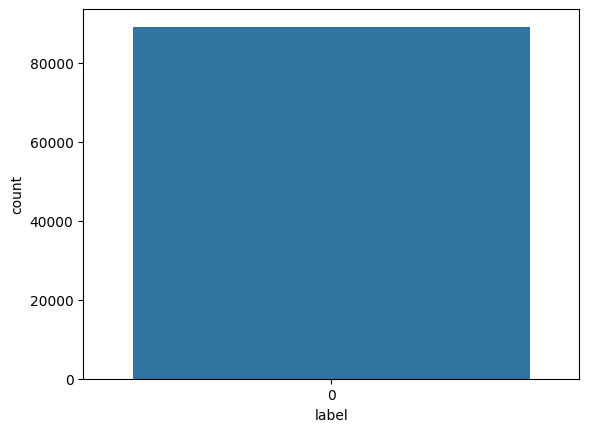

In [39]:
ax = sns.countplot(x ="label", data = DF_ETA)


In [40]:
# Save DF to a CSV file
DF.to_csv('DF_test.csv', index=False)

# Save DF_sup to a CSV file
#DF_sup.to_csv('DF1_sup.csv', index=False)


PermissionError: [Errno 13] Permission denied: 'DF_test.csv'